In [7]:
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt

In [22]:
pld_af = md.load_pdb('2PLD_main.pdb')
pld_crystal=md.load_pdb('2pld.pdb')

backbone_crystal = pld_crystal.topology.select("backbone")
backbone_af=pld_af.topology.select("backbone")
pld_crystal

avg_distance_between_atoms= np.mean(np.sqrt(np.sum((pld_crystal.xyz[:, 0, :] - pld_af.xyz[:, 21, :])**2, axis=1))) #average distance between two atoms for pld_crystal

avg_distance_between_atoms

backbone_crystal

backbone_af

array([  0,   1,   2,   3,   4,   5,   6,   8,  10,  11,  12,  14,  17,
        18,  19,  20,  21,  22,  23,  25,  29,  30,  31,  33,  39,  40,
        41,  43,  48,  49,  50,  52,  54,  55,  56,  58,  63,  64,  65,
        67,  72,  73,  74,  76,  86,  87,  88,  90,  98,  99, 100, 102,
       108, 109, 110, 112, 113, 114, 115, 117, 119, 120, 121, 123, 127,
       128, 129, 131, 134, 135, 136, 138, 145, 146, 147, 149, 150, 151,
       152, 154, 159, 160, 161, 163, 164, 165, 166, 168, 173, 174, 175,
       177, 183, 184, 185, 187, 191, 192, 193, 195, 199, 200, 201, 203,
       207, 208, 209, 211, 218, 219, 220, 222, 225, 226, 227, 229, 232,
       233, 234, 236, 243, 244, 245, 247, 251, 252, 253, 254, 255, 256,
       257, 259, 260, 261, 262, 264, 271, 272, 273, 275, 279, 280, 281,
       283, 286, 287, 288, 290, 297, 298, 299, 301, 306, 307, 308, 310,
       317, 318, 319, 321, 325, 326, 327, 329, 334, 335, 336, 338, 341,
       342, 343, 345, 349, 350, 351, 353, 355, 356, 357, 359, 36

In [10]:
print(pld_af)

<mdtraj.Trajectory with 1 frames, 959 atoms, 117 residues, without unitcells>


In [6]:
print(pld_crystal)

<mdtraj.Trajectory with 1 frames, 1906 atoms, 117 residues, without unitcells>


In [29]:
import mdtraj as md
import numpy as np

def compute_rmsd(pdb_file_1, pdb_file_2):
    # Load the trajectories
    traj1 = md.load(pdb_file_1)
    traj2 = md.load(pdb_file_2)

    # Check the number of residues in each file are the same
    if traj1.n_residues != traj2.n_residues:
        raise ValueError("The two PDB files have different number of residues")

    # Select the backbone atoms
    backbone_indices = traj1.topology.select("backbone")

    # Superimpose traj2 onto traj1 for the selected backbone atoms
    traj2.superpose(traj1, atom_indices=backbone_indices)

    # Extract the coordinates of the backbone atoms
    coords_1 = traj1.xyz[0][backbone_indices]
    coords_2 = traj2.xyz[0][backbone_indices]

    # Compute the RMSD
    diff = coords_1 - coords_2
    rmsd = np.sqrt(np.mean(np.sum(diff**2, axis=1)))

    return rmsd


In [37]:
rmsd_pld=compute_rmsd('2PLD_main.pdb','2pld.pdb')

# Compute squared differences for each atom

diff = backbone_af.xyz[0] - backbone_crystal.xyz[0]
squared_diffs = np.sum(diff**2, axis=1)

# Take square root to get RMSD for each atom
per_atom_rmsd = np.sqrt(squared_diffs)


AttributeError: 'numpy.ndarray' object has no attribute 'xyz'

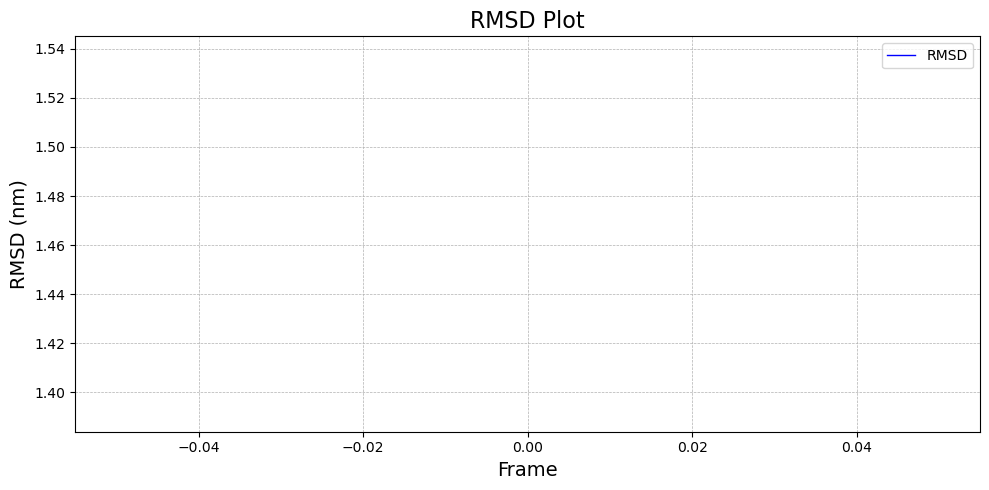

In [35]:
plt.figure(figsize=(10, 5))
plt.plot(rmsd_pld, color='blue', linestyle='-', linewidth=1, label='RMSD')
plt.xlabel('Frame', fontsize=14)
plt.ylabel('RMSD (nm)', fontsize=14)
plt.title('RMSD Plot', fontsize=16)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()
